In [ ]:
"""
Group Members

181805036 - Seher Kumsar
181805057 - Kardelen Gel
181805067 - Buse Latife Beker
181805077 - Emine Ece Coşkunçay
"""

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 28 16:47:05 2022

@author: DELL
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy import signal
import librosa, librosa.display
import pandas as pd
from scipy.fftpack import fft

In [2]:
frequency_sampling, audio_signal = wavfile.read("C:/Users/buseb/Desktop/Audio Recognition/codes/sounds.wav")

In [3]:
# Normalleştirme yapıyoruz
audio_signal = audio_signal / np.power(2, 15)

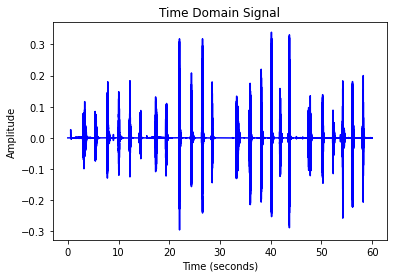

In [4]:
############# Time Domain - 1
time_axis = 1 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)
plt.plot(time_axis, audio_signal, color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Time Domain Signal')
plt.show()

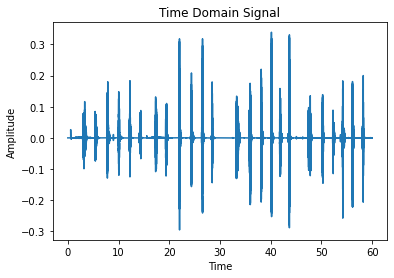

In [5]:
############# Time Domain - 2 Plot
N = (60 - 0) * frequency_sampling
time = np.linspace(0, 60, N)
plt.plot (time, audio_signal)
plt.title ('Time Domain Signal')
plt.xlabel ('Time')
plt.ylabel ('Amplitude')
plt.show ()

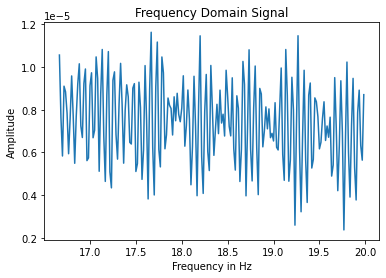

In [6]:
############# Frequency Domain Plot
frequency = np.linspace (0.0, frequency_sampling/2, int (N/2))
freq_data = fft(audio_signal)
y = 2/N * np.abs (freq_data [0:int (N/2)])
plt.plot(frequency[1000:1200], y[1000:1200])
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency in Hz')
plt.ylabel("Amplitude")
plt.show()

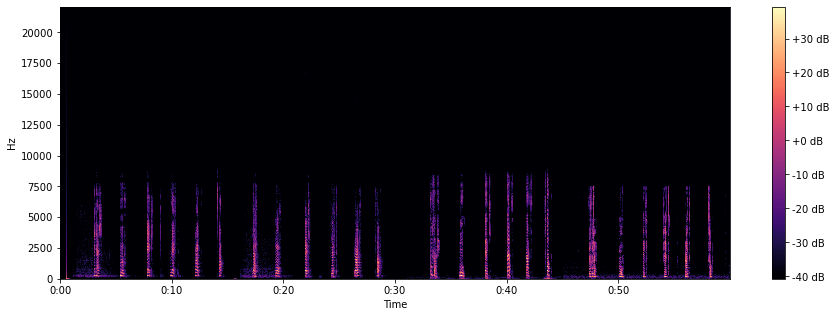

In [7]:
############# Sinyalin STFT sini buluyoruz ve çizdiriyoruz.
sr = 44100
hop_length = 512
n_fft = 2048
X = librosa.stft(audio_signal, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(S, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [8]:
############# zero array oluşturuyoruz. Labellar için.
arr = np.zeros( (len(S[1]), ) , dtype=np.int64)
#5168/60 = 86.1 , stft grafiğinde nokta belirle(x) , sonra 86 ile çarp

In [9]:
#Buse'nin sesi ## Datayı labellıyoruz. Manuel olarak.
arr[254:324]=0 
arr[457:521]=1 
arr[663:724]=2 
arr[844:897]=3 
arr[1038:1085]=4 
arr[1206:1261]=5 

In [10]:
#Kardelen'in sesi ## Datayı labellıyoruz. Manuel olarak.
arr[1473:1530]=0 
arr[1655:1710]=1 
arr[1886:1929]=2 
arr[2081:2143]=3 
arr[2268:2325]=4 
arr[2428:2482]=5 

In [11]:
# Seher'in sesi ## Datayı labellıyoruz. Manuel olarak.
arr[2850:2936]=0 
arr[3074:3125]=1 
arr[3272:3327]=2 
arr[3444:3499]=3 
arr[3588:3649]=4 
arr[3733:3797]=5 

In [12]:
#Ece'nin sesi ## Datayı labellıyoruz. Manuel olarak.
arr[4073:4150]=0 
arr[4309:4354]=1 
arr[4492:4534]=2 
arr[4650:4707]=3 
arr[4813:4865]=4 
arr[4992:5042]=5 

In [13]:
################## Gereksiz yerleri siliyoruz. 40 saniyeden sonrasını
copy_S = S
a_del = np.delete(copy_S, slice(5080,5168), 1)
print(a_del)

[[-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -39.97471818
  -36.58406965]
 [-40.72372759 -40.72372759 -40.72372759 ... -34.12239415 -40.72372759
  -40.72372759]
 ...
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]]


In [14]:
############## Gereksiz yerleri siliyoruz. 40 saniyeden sonrasını
copy_arr = arr
a1_del = np.delete(copy_arr, slice(5080,5168), 0)
print(a_del)
a_del_transpose = np.transpose(a_del)
## X ve y'mizi tanımlıyoruz.
X = a_del_transpose
y = a1_del

[[-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -39.97471818
  -36.58406965]
 [-40.72372759 -40.72372759 -40.72372759 ... -34.12239415 -40.72372759
  -40.72372759]
 ...
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]
 [-40.72372759 -40.72372759 -40.72372759 ... -40.72372759 -40.72372759
  -40.72372759]]


In [ ]:
# data kaydetme
"""
df_data = pd.DataFrame(data=X)
df_data.to_csv(r'D:\Spyder-Kodlar\biyomedikal\final-project\dataset.csv',index=False,header=True)
"""

In [16]:
######################## MACHINE LEARNING ########################
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
torch.manual_seed(5)

In [18]:
validation_size = 0.25
seed = 5

In [19]:
# Datayı %20 test %80 train olacak şekilde ayırıyoruz.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = validation_size,random_state = seed)

In [20]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test) # y_test.values

In [21]:
class Model(nn.Module):
    def __init__(self, in_features=1025, out_features=6):
        super().__init__()
        self.fc1=nn.Linear(in_features, 1600)
        self.fc2=nn.Linear(1600, 64)
        self.out=nn.Linear(64, out_features)
        
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.out(x)
        return x

In [22]:
model=Model()

In [23]:
criterion=nn.CrossEntropyLoss()  # loss function seçtik
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)  # optim adlı optimizerı seçtik

In [24]:
epochs=100
losses=[]
for i in range(epochs):
    y_pred=model.forward(X_train)
    loss=criterion(y_pred, y_train)
    losses.append(loss)
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 17.374000549316406
Epoch 10 and loss is: 6.757960796356201
Epoch 20 and loss is: 0.9403263926506042
Epoch 30 and loss is: 0.7413051724433899
Epoch 40 and loss is: 0.7189906239509583
Epoch 50 and loss is: 0.7159008383750916
Epoch 60 and loss is: 0.7032539248466492
Epoch 70 and loss is: 0.6949496269226074
Epoch 80 and loss is: 0.6907986402511597
Epoch 90 and loss is: 0.6875789165496826


In [25]:
with torch.no_grad():
    y_eval=model.forward(X_test)
    loss=criterion(y_eval, y_test)

In [26]:
correct=0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val=model.forward(data)
        print(f'{i+1}. {str(y_val)}   {y_test[i]}')
        
        if y_val.argmax().item()==y_test[i]:
            correct+=1
            
print(f'Doğru sayısı: {correct}')

1. tensor([ 0.4174, -0.1261, -0.4007,  0.1180,  0.2085,  0.1167])   2
2. tensor([ 0.6342, -0.6922, -1.0306, -0.3866, -0.7626, -0.4414])   0
3. tensor([ 1.6634, -2.4970, -2.6496, -2.7663, -3.5354, -2.5463])   0
4. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
5. tensor([ 1.6975, -2.5182, -2.7185, -2.8252, -3.5907, -2.5580])   0
6. tensor([ 1.7146, -2.5460, -2.6738, -2.8719, -3.6410, -2.6152])   0
7. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
8. tensor([ 1.7142, -2.5341, -2.6947, -2.8673, -3.6330, -2.5933])   0
9. tensor([ 1.4683, -2.0035, -2.3529, -2.4639, -3.0673, -2.0097])   0
10. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
11. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
12. tensor([ 1.5804, -2.3307, -2.5402, -2.6538, -3.4081, -2.3572])   0
13. tensor([ 1.5658, -2.3183, -2.4793, -2.5681, -3.2449, -2.2853])   1
14. tensor([ 1.7194, -2.5588, -2.6791, -2.8810, -3.6517, -2.6278])   0
15. tensor([ 1.

128. tensor([ 1.6471, -2.4748, -2.6104, -2.7466, -3.5198, -2.5314])   0
129. tensor([ 1.4826, -2.1507, -2.3829, -2.4755, -3.1956, -2.1744])   0
130. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
131. tensor([ 0.5644,  0.0740,  0.1770, -0.1522, -0.6471,  0.1087])   1
132. tensor([ 1.6595, -2.4863, -2.6041, -2.7613, -3.5389, -2.5633])   0
133. tensor([ 1.6816, -2.4820, -2.6720, -2.8011, -3.5641, -2.5355])   0
134. tensor([ 0.6475, -1.0115, -1.1547, -0.5681, -1.0339, -0.7923])   4
135. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
136. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
137. tensor([ 1.7057, -2.5120, -2.7083, -2.8484, -3.6118, -2.5588])   0
138. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
139. tensor([ 1.6958, -2.5256, -2.6485, -2.8335, -3.6058, -2.5988])   0
140. tensor([ 1.6962, -2.5339, -2.6312, -2.8280, -3.5788, -2.5622])   0
141. tensor([ 0.9000, -1.0212, -1.6520, -1.3396, -1.8689, -0.895

311. tensor([ 1.5477, -2.3357, -2.4020, -2.3891, -3.0736, -2.2987])   0
312. tensor([ 1.7093, -2.5203, -2.6941, -2.8544, -3.6176, -2.5742])   0
313. tensor([ 1.7075, -2.5350, -2.6728, -2.8592, -3.6234, -2.5991])   0
314. tensor([ 1.6630, -2.4623, -2.6444, -2.7749, -3.5410, -2.5118])   0
315. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
316. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
317. tensor([ 0.9294, -1.3260, -1.4130, -1.0939, -1.5921, -1.2173])   0
318. tensor([ 1.6729, -2.4430, -2.6603, -2.7978, -3.5540, -2.4877])   0
319. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
320. tensor([ 1.5741, -2.3432, -2.3992, -2.6255, -3.3798, -2.4683])   4
321. tensor([ 1.7146, -2.5394, -2.6872, -2.8689, -3.6366, -2.6026])   0
322. tensor([ 1.6652, -2.4474, -2.6816, -2.7876, -3.5422, -2.4685])   0
323. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
324. tensor([ 1.7206, -2.5406, -2.7032, -2.8800, -3.6448, -2.598

474. tensor([ 1.6570, -2.4351, -2.6450, -2.7608, -3.5161, -2.4831])   4
475. tensor([ 1.6486, -2.4343, -2.6231, -2.7517, -3.5200, -2.4837])   0
476. tensor([ 1.7104, -2.5647, -2.6790, -2.8629, -3.6336, -2.6273])   0
477. tensor([ 1.7100, -2.5178, -2.6958, -2.8589, -3.6207, -2.5740])   0
478. tensor([ 1.6949, -2.5256, -2.6539, -2.8333, -3.6014, -2.5937])   0
479. tensor([ 1.1744, -1.5824, -1.7426, -1.7053, -2.2921, -1.6397])   4
480. tensor([ 1.7048, -2.5107, -2.6846, -2.8481, -3.6123, -2.5709])   0
481. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
482. tensor([ 0.4913, -0.3201, -0.4894, -0.4467, -0.6777, -0.1723])   0
483. tensor([ 0.5583,  0.0450, -0.2638,  0.0636,  0.2803,  0.1089])   0
484. tensor([ 1.6988, -2.5000, -2.6776, -2.8494, -3.6149, -2.5499])   0
485. tensor([ 1.7007, -2.5114, -2.6686, -2.8496, -3.6116, -2.5711])   0
486. tensor([ 1.7178, -2.5493, -2.6812, -2.8786, -3.6458, -2.6158])   0
487. tensor([ 1.7225, -2.5621, -2.6868, -2.8876, -3.6562, -2.628

655. tensor([ 1.4562, -2.1371, -2.3589, -2.4279, -3.1610, -2.1813])   0
656. tensor([ 1.6585, -2.4440, -2.6404, -2.7807, -3.5438, -2.4815])   0
657. tensor([ 1.4964, -2.2422, -2.4363, -2.3658, -3.0749, -2.1718])   4
658. tensor([ 0.8289, -1.0845, -1.3528, -1.2122, -1.7155, -0.9673])   3
659. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
660. tensor([-0.0061,  0.0333,  0.9982,  0.4776,  0.4588,  0.8145])   3
661. tensor([ 1.7222, -2.5626, -2.6839, -2.8870, -3.6565, -2.6300])   0
662. tensor([ 1.7185, -2.5546, -2.6828, -2.8793, -3.6478, -2.6207])   0
663. tensor([ 1.7199, -2.5385, -2.7077, -2.8787, -3.6414, -2.5932])   0
664. tensor([ 1.5303, -2.1940, -2.4469, -2.5662, -3.2985, -2.2403])   0
665. tensor([ 1.4575, -2.1751, -2.3568, -2.4228, -3.1528, -2.2120])   0
666. tensor([ 1.6955, -2.5473, -2.6426, -2.8233, -3.5615, -2.5435])   0
667. tensor([ 1.6039, -2.3836, -2.5348, -2.6583, -3.4219, -2.4516])   0
668. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.630

831. tensor([ 0.7666, -1.2650, -1.3218, -0.7222, -1.1376, -0.9433])   2
832. tensor([ 1.6632, -2.4396, -2.6632, -2.7757, -3.5348, -2.4779])   0
833. tensor([ 0.6763, -0.8976, -1.0151, -0.6254, -1.0032, -0.7821])   1
834. tensor([ 1.6768, -2.4808, -2.6418, -2.7918, -3.5617, -2.5498])   0
835. tensor([ 1.7148, -2.5467, -2.6713, -2.8728, -3.6421, -2.6173])   0
836. tensor([ 1.6266, -2.3976, -2.6413, -2.6840, -3.4517, -2.4408])   2
837. tensor([ 1.3903, -1.9939, -2.0062, -2.3712, -3.0135, -2.1635])   5
838. tensor([ 1.6870, -2.5275, -2.6522, -2.8155, -3.5865, -2.5927])   0
839. tensor([ 1.6407, -2.4050, -2.6059, -2.7378, -3.5018, -2.4577])   0
840. tensor([ 1.6604, -2.4370, -2.6522, -2.7769, -3.5250, -2.4418])   0
841. tensor([ 0.3571, -0.0704, -0.5257, -0.0382, -0.0087,  0.4897])   0
842. tensor([ 1.0632, -1.1486, -1.0543, -1.0401, -1.4201, -1.0641])   0
843. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
844. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.630

1035. tensor([ 1.1507, -1.7242, -1.7577, -1.6278, -2.1742, -1.6350])   0
1036. tensor([ 1.6718, -2.4908, -2.6109, -2.7892, -3.5594, -2.5697])   0
1037. tensor([ 1.6495, -2.4221, -2.6649, -2.7274, -3.4913, -2.4675])   0
1038. tensor([ 1.6558, -2.4745, -2.6141, -2.7474, -3.5261, -2.5483])   0
1039. tensor([ 1.7230, -2.5616, -2.6898, -2.8885, -3.6562, -2.6260])   0
1040. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
1041. tensor([ 1.6899, -2.5072, -2.6310, -2.8249, -3.5752, -2.5433])   0
1042. tensor([ 1.7155, -2.5249, -2.7053, -2.8693, -3.6308, -2.5791])   0
1043. tensor([ 0.5133, -0.4507, -0.5117, -0.5462, -0.8045, -0.3982])   1
1044. tensor([ 0.2568, -0.7025,  0.4213,  0.5034,  0.5706, -0.1557])   2
1045. tensor([ 1.6430, -2.3989, -2.6591, -2.7354, -3.4945, -2.4270])   0
1046. tensor([ 1.7179, -2.5438, -2.6875, -2.8776, -3.6435, -2.6075])   0
1047. tensor([ 0.7690, -0.9548, -0.5118, -0.7331, -1.1042, -1.2049])   3
1048. tensor([ 1.5659, -2.3788, -2.4094, -2.5876, -

1238. tensor([ 1.7205, -2.5605, -2.6831, -2.8829, -3.6532, -2.6280])   0
1239. tensor([ 1.7148, -2.5445, -2.6753, -2.8708, -3.6412, -2.6140])   0
1240. tensor([ 1.7061, -2.5116, -2.6967, -2.8487, -3.6122, -2.5666])   0
1241. tensor([ 1.6909, -2.4825, -2.6852, -2.8364, -3.5979, -2.5204])   0
1242. tensor([ 1.7218, -2.5492, -2.6988, -2.8849, -3.6493, -2.6087])   0
1243. tensor([ 1.7134, -2.5123, -2.7259, -2.8609, -3.6195, -2.5559])   0
1244. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
1245. tensor([ 1.6650, -2.4550, -2.6535, -2.7851, -3.5521, -2.4952])   0
1246. tensor([ 1.6703, -2.4796, -2.6131, -2.7990, -3.5611, -2.5459])   0
1247. tensor([ 1.7234, -2.5644, -2.6880, -2.8894, -3.6582, -2.6301])   0
1248. tensor([0.6851, 0.2104, 0.9242, 0.0222, 0.0793, 0.0277])   2
1249. tensor([ 1.4825, -2.2661, -2.3541, -2.4209, -3.1606, -2.3302])   0
1250. tensor([ 1.6998, -2.5339, -2.6577, -2.8415, -3.6129, -2.6039])   0
1251. tensor([ 1.4575, -2.1435, -2.3667, -2.3858, -3.0887

In [27]:
percent = (correct/1270)*100
print(percent)

79.60629921259843


In [28]:
torch.save(model.state_dict(), "audio_recognition.pt")